In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings("ignore")

C:\Users\Asif\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\Asif\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Asif\Anaconda3\lib\site-packages\distributed\utils.py:128: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  % (host, default, e), RuntimeWarning)


In [2]:
df=pd.read_csv("train.csv")
print("Shape of dataframe is : ",df.shape)
df.head(-12)

Shape of dataframe is :  (156060, 4)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156043,156044,8544,is darkly atmospheric,3
156044,156045,8544,with Herrmann quietly suggesting the sadness a...,2
156045,156046,8544,Herrmann quietly suggesting the sadness and ob...,2
156046,156047,8544,Herrmann,2


In [3]:
print(" Total Different Sentences is : ",len(df['SentenceId'].unique()))
print(" Total Different Phrases is : ",len(df['PhraseId'].unique()))

 Total Different Sentences is :  8529
 Total Different Phrases is :  156060


In [4]:
print(df['Phrase'][0])
print('__'*50)
print(df['Phrase'][100])
print('__'*50)
print(df['Phrase'][5433])
print('__'*50)
print(df['Phrase'][156053])
# here we can see some reviews contains special characet.So we will remove it using regular expression

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
____________________________________________________________________________________________________
would have a hard time sitting through this one .
____________________________________________________________________________________________________
A superfluous sequel ... plagued by that old familiar feeling of ` let 's get this thing over with ' :
____________________________________________________________________________________________________
beneath Hearst 's forced avuncular chortles


In [5]:
stop_words = set(stopwords.words('english'))   
from tqdm import tqdm
preprocessed_Phrase = []
# tqdm is for printing the status bar
for sentance in tqdm(df['Phrase'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stop_words)
    preprocessed_Phrase.append(sentance.strip())

100%|███████████████████████████████████████████████████████████████████████| 156060/156060 [00:05<00:00, 29790.74it/s]


In [6]:
df['Phrase']=preprocessed_Phrase

In [7]:
# After Removing stop words,Special character
print(df['Phrase'][0])
print('__'*50)
print(df['Phrase'][100])
print('__'*50)
print(df['Phrase'][5433])
print('__'*50)
print(df['Phrase'][156053])
# Here We have removed all stop words and special symbols

series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story
____________________________________________________________________________________________________
would hard time sitting one
____________________________________________________________________________________________________
superfluous sequel plagued old familiar feeling let get thing
____________________________________________________________________________________________________
beneath hearst forced avuncular chortles


In [8]:
df.tail(20)

,PhraseId,SentenceId,Phrase,Sentiment
156040,156041,8544,darkly atmospheric herrmann quietly suggesting...,2
156041,156042,8544,darkly atmospheric herrmann quietly suggesting...,2
156042,156043,8544,darkly atmospheric,2
156043,156044,8544,darkly atmospheric,3
156044,156045,8544,herrmann quietly suggesting sadness obsession ...,2
156045,156046,8544,herrmann quietly suggesting sadness obsession ...,2
156046,156047,8544,herrmann,2
156047,156048,8544,quietly suggesting sadness obsession beneath h...,1
156048,156049,8544,suggesting sadness obsession beneath hearst fo...,2
156049,156050,8544,suggesting sadness obsession,2


Text(0, 0.5, 'Count')

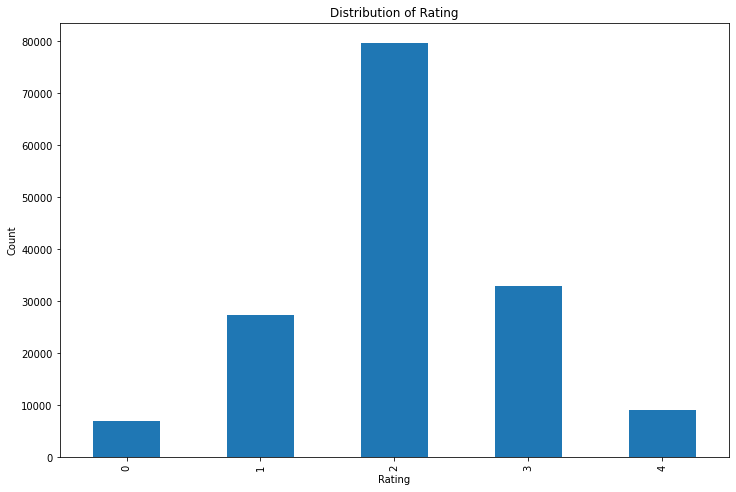

In [9]:

# Plotting distribution of rating

plt.figure(figsize=(12,8))
df['Sentiment'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

In [10]:
#Checking for Null values
print("Total Null Values Are : ",len(df.isnull().any()))


Total Null Values Are :  4


In [11]:
# Drop missing values
df.dropna(inplace=True)

In [12]:
len(df['Phrase'][11])

13

In [13]:
# Here I will use only review whose length is greater than 4
df2 = df[df['Phrase'].apply(lambda x: len(str(x)) >=4)]

In [14]:
df2.shape

(152840, 4)

In [15]:
df2.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,series escapades demonstrating adage good goos...,1
1,2,1,series escapades demonstrating adage good goose,2
2,3,1,series,2
4,5,1,series,2
5,6,1,escapades demonstrating adage good goose,2


In [16]:
def show_wordcloud(data, stopwords, title = None):  
    """
    Overridden the function from `https://www.kaggle.com/parth05rohilla/sentiment-analysis-using-7-different-techniques`
    """
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

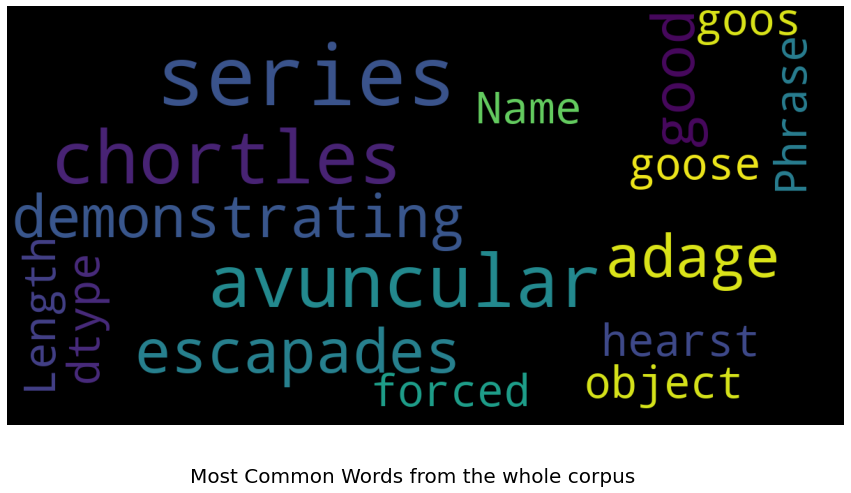

In [17]:
show_wordcloud(df['Phrase'], stop_words, 'Most Common Words from the whole corpus')

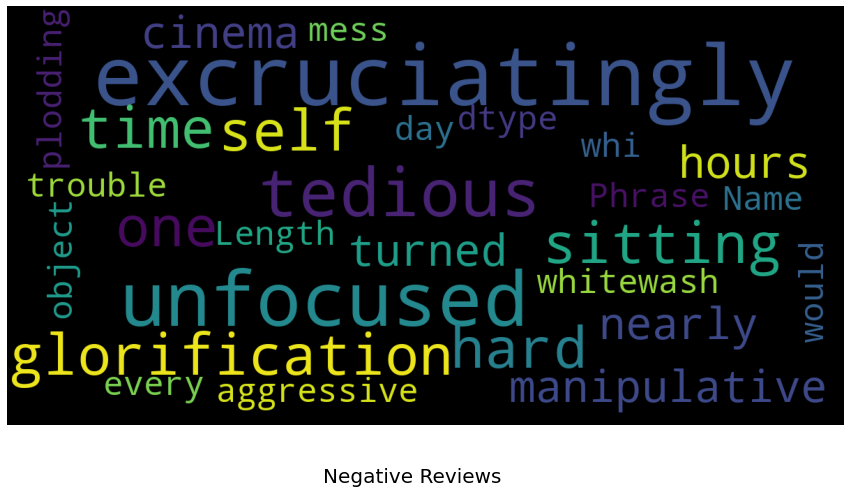

In [18]:
show_wordcloud(df[df['Sentiment'] == 0]['Phrase'], stop_words, 'Negative Reviews')

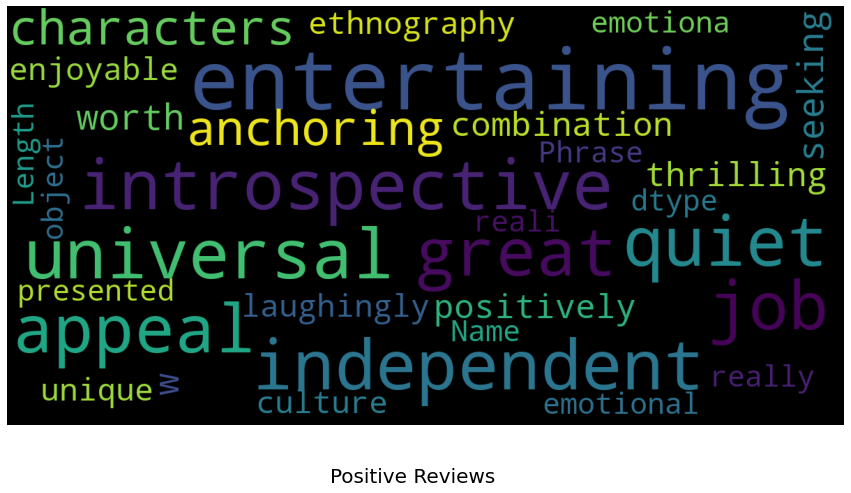

In [19]:
show_wordcloud(df[df['Sentiment'] == 4]['Phrase'], stop_words, 'Positive Reviews')

In [20]:
# Spliting data into training set and validation


X_train, X_test, y_train, y_test = train_test_split(df['Phrase'], df['Sentiment'], test_size=0.3)
print('Loading %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))

Loading 109242 training examples and 46818 validation examples. 



# BAG OF WORDS WITH MULTINOMIAL NB and OTHER ALGORITHMS

In [21]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(X_train)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(X_train)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

# Train MultinomialNB classifier

mnb = MultinomialNB(alpha=0.1)
mnb.fit(final_counts, y_train)

some feature names  ['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon', 'abandoned', 'abbass', 'abbott', 'abbreviated', 'abc']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (109242, 14945)
the number of unique words  14945


MultinomialNB(alpha=0.1)

In [22]:

# Defining a function check the Model Evalutaion Metrices

def modelEvaluation(predictions):
    
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nClassification report : \n",classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n",confusion_matrix(y_test, predictions))


Accuracy on validation set: 0.5993

Classification report : 
               precision    recall  f1-score   support

           0       0.39      0.40      0.39      2085
           1       0.48      0.42      0.45      8219
           2       0.70      0.75      0.72     23793
           3       0.51      0.49      0.50      9955
           4       0.44      0.41      0.42      2766

    accuracy                           0.60     46818
   macro avg       0.50      0.49      0.50     46818
weighted avg       0.59      0.60      0.59     46818


Confusion Matrix : 
 [[  836   827   360    53     9]
 [  868  3461  3371   471    48]
 [  393  2407 17795  2857   341]
 [   51   420  3605  4833  1046]
 [    1    45   368  1220  1132]]

Confusion Matrix : 


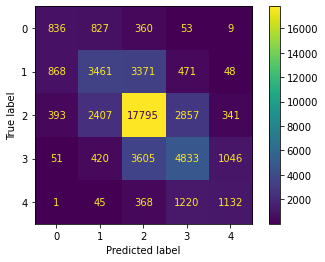

In [23]:
# Evaluating the model on validaton set

predictions = mnb.predict(count_vect.transform(X_test))
modelEvaluation(predictions)
print("\nConfusion Matrix : \n",plot_confusion_matrix(mnb,count_vect.transform(X_test),y_test))

In [25]:
# Saving into Pickle file
pickle.dump(count_vect,open('countVect_imdb.pkl','wb'))
pickle.dump(mnb,open('Naive_Bayes_model_imdb.pkl','wb'))

In [ ]:
#Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(final_counts, y_train)
predictions =rf.predict(count_vect.transform(X_test))
modelEvaluation(predictions)
print("\nConfusion Matrix : \n",plot_confusion_matrix(rf,count_vect.transform(X_test),y_test))


Accuracy on validation set: 0.6052

Classification report : 
               precision    recall  f1-score   support

           0       0.52      0.26      0.34      2112
           1       0.54      0.21      0.30      8166
           2       0.62      0.93      0.74     23880
           3       0.56      0.32      0.41      9899
           4       0.55      0.28      0.37      2761

    accuracy                           0.61     46818
   macro avg       0.56      0.40      0.43     46818
weighted avg       0.59      0.61      0.56     46818


Confusion Matrix : 
 [[  542   632   886    46     6]
 [  375  1711  5729   308    43]
 [  104   630 22104   957    85]
 [   13   145  6043  3196   502]
 [    4    22   759  1196   780]]

Confusion Matrix : 


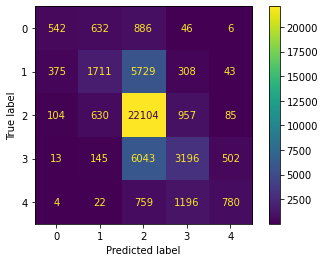

In [36]:
#Linear SVM with SGD optimizer
sgd=SGDClassifier(loss='hinge')
sgd.fit(final_counts, y_train)
predictions = sgd.predict(count_vect.transform(X_test))
modelEvaluation(predictions)
print("\nConfusion Matrix : \n",plot_confusion_matrix(sgd,count_vect.transform(X_test),y_test))


Accuracy on validation set: 0.6219

Classification report : 
               precision    recall  f1-score   support

           0       0.41      0.45      0.43      2112
           1       0.50      0.50      0.50      8166
           2       0.72      0.76      0.74     23880
           3       0.54      0.49      0.52      9899
           4       0.48      0.36      0.41      2761

    accuracy                           0.62     46818
   macro avg       0.53      0.51      0.52     46818
weighted avg       0.62      0.62      0.62     46818


Confusion Matrix : 
 [[  943   862   259    40     8]
 [ 1046  4080  2731   284    25]
 [  284  2855 18222  2369   150]
 [   39   381  3706  4878   895]
 [    7    54   288  1419   993]]

Confusion Matrix : 


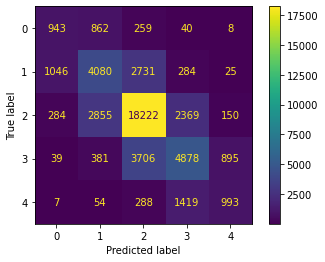

In [38]:
# Decision Tree Classifier
dt=DecisionTreeClassifier()
dt.fit(final_counts, y_train)
predictions = dt.predict(count_vect.transform(X_test))
modelEvaluation(predictions)
print("\nConfusion Matrix : \n",plot_confusion_matrix(dt,count_vect.transform(X_test),y_test))


Accuracy on validation set: 0.5691

Classification report : 
               precision    recall  f1-score   support

           0       0.63      0.13      0.22      2112
           1       0.53      0.10      0.17      8166
           2       0.57      0.96      0.72     23880
           3       0.54      0.21      0.30      9899
           4       0.64      0.17      0.27      2761

    accuracy                           0.57     46818
   macro avg       0.58      0.32      0.34     46818
weighted avg       0.56      0.57      0.49     46818


Confusion Matrix : 
 [[  284   354  1403    69     2]
 [  132   826  6951   246    11]
 [   30   274 22967   582    27]
 [    3    76  7507  2089   224]
 [    1    28  1349   906   477]]

Confusion Matrix : 


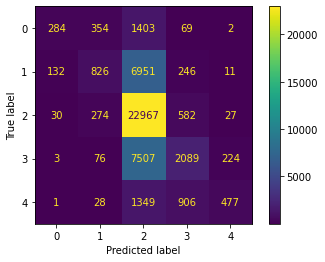

In [40]:
#XGBoost Classifier
xg=XGBClassifier()
xg.fit(final_counts, y_train)
predictions = xg.predict(count_vect.transform(X_test))
modelEvaluation(predictions)
print("\nConfusion Matrix : \n",plot_confusion_matrix(xg,count_vect.transform(X_test),y_test))


Accuracy on validation set: 0.6403

Classification report : 
               precision    recall  f1-score   support

           0       0.54      0.29      0.38      2085
           1       0.54      0.38      0.45      8219
           2       0.68      0.87      0.77     23793
           3       0.57      0.46      0.51      9955
           4       0.58      0.33      0.42      2766

    accuracy                           0.64     46818
   macro avg       0.58      0.47      0.50     46818
weighted avg       0.62      0.64      0.62     46818


Confusion Matrix : 
 [[  609   939   478    51     8]
 [  413  3119  4275   378    34]
 [   84  1354 20735  1559    61]
 [   17   289  4495  4600   554]
 [    5    35   393  1420   913]]

Confusion Matrix : 


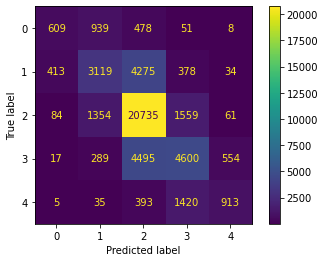

In [26]:
# Logistic Regression
lr = LogisticRegression(C=1)
lr.fit(final_counts, y_train)
predictions = lr.predict(count_vect.transform(X_test))
modelEvaluation(predictions)
print("\nConfusion Matrix : \n",plot_confusion_matrix(lr,count_vect.transform(X_test),y_test))

In [27]:
pickle.dump(lr,open('lr.pkl','wb'))

In [ ]:
#SVM with rbf kernal
svm=SVC(C=1,kernel='rbf')
svm.fit(final_counts, y_train)
predictions =svm.predict(count_vect.transform(X_test))
modelEvaluation(predictions)
print("\nConfusion Matrix : \n",plot_confusion_matrix(svm,count_vect.transform(X_test),y_test))

# TF-IDF WITH MULTINOMIAL NB AND OTHER ALGORITHM

In [24]:
tf_idf_vect = TfidfVectorizer()
tf_idf_vect.fit(X_train)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(X_train)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon', 'abandoned', 'abbass', 'abbott', 'abbreviated', 'abc']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (109242, 14933)
the number of unique words including both unigrams and bigrams  14933


In [25]:
# Train MultinomialNB classifier

mnb = MultinomialNB(alpha=0.1)
mnb.fit(final_tf_idf, y_train)

MultinomialNB(alpha=0.1)


Accuracy on validation set: 0.5940

Classification report : 
               precision    recall  f1-score   support

           0       0.49      0.18      0.26      2129
           1       0.50      0.34      0.40      8338
           2       0.63      0.84      0.72     23722
           3       0.53      0.43      0.47      9848
           4       0.55      0.19      0.28      2781

    accuracy                           0.59     46818
   macro avg       0.54      0.39      0.43     46818
weighted avg       0.57      0.59      0.56     46818


Confusion Matrix : 
 [[  374   913   790    49     3]
 [  267  2800  4953   310     8]
 [  111  1670 19855  1983   103]
 [    8   225  5035  4260   320]
 [    1    15   749  1496   520]]

Confusion Matrix : 


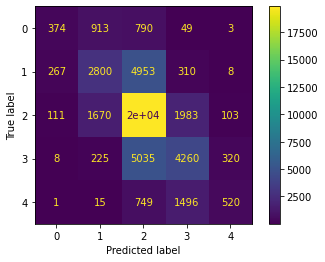

In [26]:
# Evaluating the model on validaton set

predictions = mnb.predict(tf_idf_vect.transform(X_test))
modelEvaluation(predictions)
print("\nConfusion Matrix : \n",plot_confusion_matrix(mnb,tf_idf_vect.transform(X_test),y_test))


Accuracy on validation set: 0.5554

Classification report : 
               precision    recall  f1-score   support

           0       0.55      0.08      0.14      2129
           1       0.50      0.09      0.15      8338
           2       0.56      0.96      0.71     23722
           3       0.53      0.19      0.28      9848
           4       0.58      0.12      0.20      2781

    accuracy                           0.56     46818
   macro avg       0.54      0.29      0.30     46818
weighted avg       0.54      0.56      0.46     46818


Confusion Matrix : 
 [[  174   364  1538    47     6]
 [   97   731  7277   215    18]
 [   32   269 22863   516    42]
 [   10    96  7663  1891   188]
 [    3    14  1522   897   345]]

Confusion Matrix : 


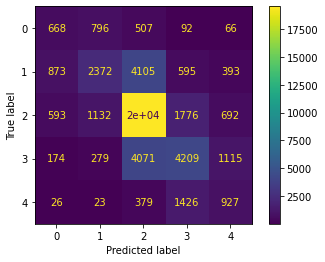

In [29]:
# svm with SGD optimzer
sg = SGDClassifier(loss='hinge',n_jobs=-1)
sg.fit(final_tf_idf, y_train)
predictions = sg.predict(tf_idf_vect.transform(X_test))
modelEvaluation(predictions)
print("\nConfusion Matrix : \n",plot_confusion_matrix(sg,count_vect.transform(X_test),y_test))


Accuracy on validation set: 0.5693

Classification report : 
               precision    recall  f1-score   support

           0       0.59      0.15      0.24      2129
           1       0.53      0.12      0.19      8338
           2       0.58      0.95      0.72     23722
           3       0.52      0.23      0.32      9848
           4       0.60      0.18      0.28      2781

    accuracy                           0.57     46818
   macro avg       0.56      0.33      0.35     46818
weighted avg       0.56      0.57      0.49     46818


Confusion Matrix : 
 [[  320   347  1350   109     3]
 [  176   974  6805   370    13]
 [   38   370 22614   674    26]
 [    8   111  7187  2245   297]
 [    0    46  1328   905   502]]

Confusion Matrix : 


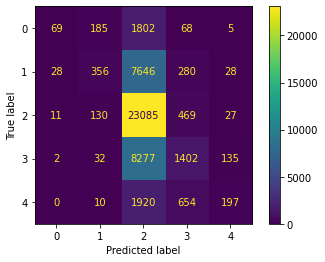

In [30]:
# XGBoost Classifier
xg = XGBClassifier(n_jobs=-1)
xg.fit(final_tf_idf, y_train)
predictions = xg.predict(tf_idf_vect.transform(X_test))
modelEvaluation(predictions)
print("\nConfusion Matrix : \n",plot_confusion_matrix(xg,count_vect.transform(X_test),y_test))


Accuracy on validation set: 0.6123

Classification report : 
               precision    recall  f1-score   support

           0       0.41      0.43      0.42      2129
           1       0.49      0.49      0.49      8338
           2       0.72      0.76      0.74     23722
           3       0.52      0.48      0.50      9848
           4       0.46      0.34      0.39      2781

    accuracy                           0.61     46818
   macro avg       0.52      0.50      0.51     46818
weighted avg       0.61      0.61      0.61     46818


Confusion Matrix : 
 [[  925   863   268    65     8]
 [  990  4125  2802   380    41]
 [  298  2876 17970  2415   163]
 [   55   496  3682  4695   920]
 [   14    73   349  1392   953]]

Confusion Matrix : 


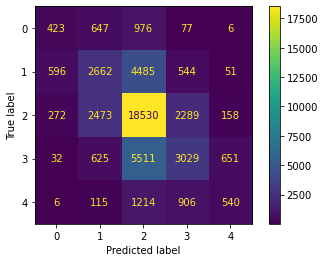

In [31]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(final_tf_idf, y_train)
predictions = dt.predict(tf_idf_vect.transform(X_test))
modelEvaluation(predictions)
print("\nConfusion Matrix : \n",plot_confusion_matrix(dt,count_vect.transform(X_test),y_test))

In [ ]:
#RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(final_tf_idf, y_train)
predictions = rf.predict(tf_idf_vect.transform(X_test))
modelEvaluation(predictions)
print("\nConfusion Matrix : \n",plot_confusion_matrix(rf,count_vect.transform(X_test),y_test))


Accuracy on validation set: 0.6268

Classification report : 
               precision    recall  f1-score   support

           0       0.54      0.17      0.26      2080
           1       0.53      0.35      0.42      8134
           2       0.66      0.88      0.76     23911
           3       0.56      0.45      0.50      9913
           4       0.61      0.24      0.35      2780

    accuracy                           0.63     46818
   macro avg       0.58      0.42      0.46     46818
weighted avg       0.61      0.63      0.60     46818


Confusion Matrix : 
 [[  350  1011   647    68     4]
 [  236  2868  4643   375    12]
 [   54  1289 20966  1548    54]
 [    8   254  4807  4486   358]
 [    1    33   488  1583   675]]

Confusion Matrix : 


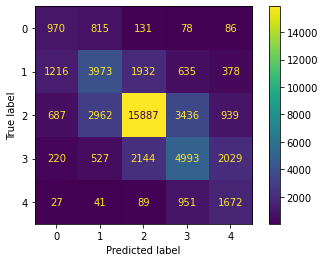

In [85]:
# Logistic Regression
lr = LogisticRegression(C=1,n_jobs=-1)
lr.fit(final_tf_idf, y_train)
predictions = lr.predict(tf_idf_vect.transform(X_test))
modelEvaluation(predictions)
print("\nConfusion Matrix : \n",plot_confusion_matrix(lr,count_vect.transform(X_test),y_test))

# WORD 2 VEC

In [41]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in df['Phrase']:
    list_of_sentance.append(sentance.split())
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)
print(w2v_model.wv.most_similar('great'))
print('='*50)
print(w2v_model.wv.most_similar('worst'))
    

[('apocalypse', 0.8403447270393372), ('loaded', 0.8218270540237427), ('sandbox', 0.7879690527915955), ('next', 0.7801650762557983), ('saw', 0.7719749808311462), ('spending', 0.7679156064987183), ('uncommitted', 0.7631170749664307), ('hamming', 0.7574003338813782), ('list', 0.7558621764183044), ('major', 0.7546285390853882)]
[('mediocre', 0.9388995170593262), ('listening', 0.9210666418075562), ('bond', 0.9210197925567627), ('churn', 0.9195202589035034), ('pleasurable', 0.9185796976089478), ('franchise', 0.9173533916473389), ('monster', 0.9159167408943176), ('holiday', 0.9152933359146118), ('evenings', 0.9134358763694763), ('pollution', 0.9130969643592834)]


In [42]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  14357
sample words  ['series', 'escapades', 'demonstrating', 'adage', 'good', 'goose', 'also', 'gander', 'occasionally', 'amuses', 'none', 'amounts', 'much', 'story', 'quiet', 'introspective', 'entertaining', 'independent', 'worth', 'seeking', 'even', 'fans', 'ismail', 'merchant', 'work', 'suspect', 'would', 'hard', 'time', 'sitting', 'one', 'positively', 'thrilling', 'combination', 'ethnography', 'intrigue', 'betrayal', 'deceit', 'murder', 'shakespearean', 'tragedy', 'juicy', 'soap', 'opera', 'aggressive', 'self', 'glorification', 'manipulative', 'whitewash', 'comedy']


In [43]:
# Transfroming the training data into feature vectors

# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 156060/156060 [03:32<00:00, 733.73it/s]

156060
50


# CONCLUSION

####  After applying many algorithm as we can see here LogisticRegression with Bag Of Words Performs better.So we will deploy                   Logistic Regression Model.